# BUSINESS UNDERSTANDING

**`OBJECTIVE/TUJUAN`**

Amazon.com, Inc. adalah multinasional teknologi yang berfokus pada e-niaga, komputasi, streaming digital dan kecerdasan buatan. Amazon terlibat dalam penjualan eceran produk konsumen dan langganan di Amerika Utara serta internasional. 
Dataset ini terdiri dari rata-rata harga High,Low,Open,Close,Volume, dan Adj Close yang disesuaikan dan volume saham Amazon selama 6 tahun lebih mulai dari tahun 2016 hingga 2021. Namun tujuan utama kami ingin memprediksi harga penutupan saham Amazon dalam 1 minggu

# DATA UNDERSTANDING

Source (REAL DATA) : https://finance.yahoo.com/quote/AMZN/history/

- Meta Data

| Variable(Key Data Points)      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| Data Start Date            |2016-04-26                                                                     |
| Data End Date         | 2021-04-23                                                                           |
| Time Period         | 6 Years                                                                        |
| Key Fields      | Open,High,Low,Close,Volume,Adj Close                                                                                |





- Variabel pada Data

| Variable(Key Data Points)      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| Date            |as day-month-date 
| Open            |as-traded opening price for the day                                                                       |
| High          | as-traded high price for the day                                                                           |
| Low         | as-traded low price for the day                                                                        |
| Close      | as-traded close price for the day                                                                                 |
| Volume     | trading volume for the day                                                                                  |
| Adj Close   |split & dividend adjusted closing price of the day 

---

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Plotting
%matplotlib inline

import warnings #What to do with warnings
warnings.filterwarnings("ignore") #Ignore the warnings

plt.rcParams["figure.figsize"] = (10,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot") #Define the style of the plot

from statsmodels.tsa.seasonal import seasonal_decompose #Describes the time data
from statsmodels.tsa.stattools import adfuller #Check if data is stationary
from statsmodels.graphics.tsaplots import plot_acf #Compute lag for ARIMA
from statsmodels.graphics.tsaplots import plot_pacf #Compute partial lag for ARIMA
from statsmodels.tsa.arima_model import ARIMA #Predictions and Forecasting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATASET SI/AMZN.csv') #read csv file

In [ ]:
df.head(10) #tampilkan 10 data pertama

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-26,626.169983,626.750000,614.880005,616.880005,616.880005,2521400
1,2016-04-27,611.799988,615.950012,601.280029,606.570007,606.570007,4068800
2,2016-04-28,615.539978,626.799988,599.200012,602.000000,602.000000,7872600
3,2016-04-29,666.000000,669.979980,654.000000,659.590027,659.590027,10310700
4,2016-05-02,663.919983,685.500000,662.030029,683.849976,683.849976,6578500
5,2016-05-03,677.359985,680.299988,670.429993,671.320007,671.320007,4923400
6,2016-05-04,662.590027,674.000000,662.140015,670.900024,670.900024,4635500
7,2016-05-05,673.309998,676.489990,656.000000,659.090027,659.090027,4884100
8,2016-05-06,656.049988,676.950012,656.010010,673.950012,673.950012,4365300
9,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200


In [ ]:
df.tail(10) #tampilkan 10 data terakhir

,Date,Open,High,Low,Close,Adj Close,Volume
1248,2021-04-12,3355.209961,3395.040039,3351.149902,3379.389893,3379.389893,3281800
1249,2021-04-13,3400.850098,3432.000000,3395.629883,3400.000000,3400.000000,3315800
1250,2021-04-14,3404.040039,3404.129883,3326.000000,3333.000000,3333.000000,3145200
1251,2021-04-15,3371.000000,3397.000000,3352.000000,3379.090088,3379.090088,3233600
1252,2021-04-16,3380.000000,3406.800049,3355.590088,3399.439941,3399.439941,3186000
1253,2021-04-19,3390.330078,3435.929932,3360.159912,3372.010010,3372.010010,2725400
1254,2021-04-20,3373.600098,3382.989990,3316.000000,3334.689941,3334.689941,2623000
1255,2021-04-21,3316.000000,3362.860107,3303.810059,3362.020020,3362.020020,2211200
1256,2021-04-22,3371.679932,3372.870117,3301.449951,3309.040039,3309.040039,2580600
1257,2021-04-23,3319.100098,3375.000000,3308.500000,3340.879883,3340.879883,3192800


In [ ]:
df.isna().sum()#cek missing value

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.describe() #cek summary statistik

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1719.277043,1737.104458,1698.973275,1718.622010,1718.622010,4.316484e+06
std,799.483202,810.242682,787.075320,798.374373,798.374373,2.091110e+06
min,611.799988,615.950012,599.200012,602.000000,602.000000,8.813000e+05
25%,978.662491,984.500000,969.157517,978.197495,978.197495,2.913225e+06
50%,1698.900024,1714.195007,1678.570007,1695.960022,1695.960022,3.708350e+06
75%,1950.875000,1977.477509,1933.629975,1957.605042,1957.605042,5.123225e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,1.656500e+07


In [ ]:
df.loc[df['Close']==min(df['Close'])]#harga close terendah pada tgl sekian

,Date,Open,High,Low,Close,Adj Close,Volume
2,2016-04-28,615.539978,626.799988,599.200012,602.0,602.0,7872600


In [ ]:
df.loc[df['Close']==max(df['Close'])] #harga close tertinggi pada tgl sekian

,Date,Open,High,Low,Close,Adj Close,Volume
1097,2020-09-02,3547.0,3552.25,3486.689941,3531.449951,3531.449951,3931500


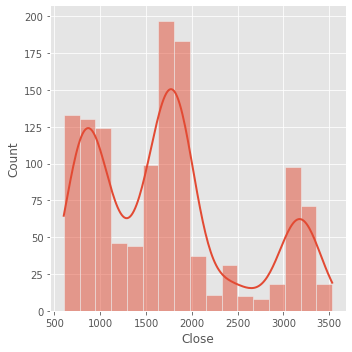

In [ ]:
import seaborn as sns
sns.displot(df['Close'], kde=True)

In [512]:
df['Close'].value_counts().head()

3322.000000    2
1855.319946    2
3400.000000    2
1642.810059    2
1619.439941    2
Name: Close, dtype: int64

#DATA PREPARATION

In [ ]:
#create subset
df_close = df[["Date", "Close"]].copy() #Get the date and open columns
df_close["Date"] = pd.to_datetime(df_close["Date"]) #Ensure the date data is in datetime format
df_close.set_index("Date", inplace = True) #Set the date to the index
df_close = df_close.asfreq("b") #Set the frequency
df_close = df_close.fillna(method  = "bfill") #Fill null values with future values

#amazonClsoe.index #Make sure the frequency remains intact
df_close.head(12) #Take a peek at the open data

,Close
Date,
2016-04-26,616.880005
2016-04-27,606.570007
2016-04-28,602.000000
2016-04-29,659.590027
2016-05-02,683.849976
2016-05-03,671.320007
2016-05-04,670.900024
2016-05-05,659.090027
2016-05-06,673.950012


Mengecek apakah stasioner atau tidak

<Figure size 1152x576 with 0 Axes>

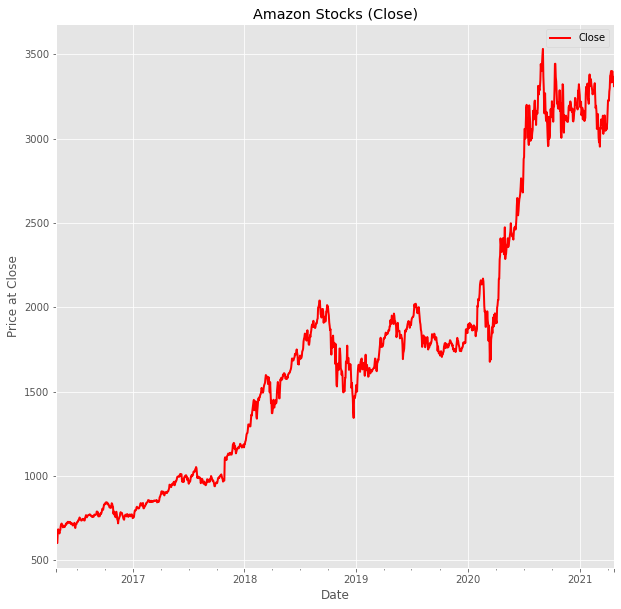

In [ ]:
plt.figure(figsize=(16,8))
y = df_close.plot(title = "Amazon Stocks (Close)",color="RED") #Get an idea of the data
y.set(ylabel = "Price at Close") #Set the y label to Close
plt.show() #Show the plot
# plt.figure(figsize=(16,8))
# plt.plot(amazonClose["Close"])
# plt.xlabel("Date")
# plt.ylabel("Close")

Dari grafik ini kita melihat bahwa pola pertambahan jumlah penumpang memiliki tren

##Stationarity Check - Rolling Statistic test

In [ ]:
rolmean=df_close.rolling(window=12).mean()
rolstd=df_close.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

                 Close
Date                  
2016-04-26         NaN
2016-04-27         NaN
2016-04-28         NaN
2016-04-29         NaN
2016-05-02         NaN
2016-05-03         NaN
2016-05-04         NaN
2016-05-05         NaN
2016-05-06         NaN
2016-05-09         NaN
2016-05-10         NaN
2016-05-11  661.683339
2016-05-12  670.104172
2016-05-13  678.716670
2016-05-16  687.771667
                Close
Date                 
2016-04-26        NaN
2016-04-27        NaN
2016-04-28        NaN
2016-04-29        NaN
2016-05-02        NaN
2016-05-03        NaN
2016-05-04        NaN
2016-05-05        NaN
2016-05-06        NaN
2016-05-09        NaN
2016-05-10        NaN
2016-05-11  35.845612
2016-05-12  36.230837
2016-05-13  31.763353
2016-05-16  21.844549


disini kita melakukan rolling terhadap rata-rata dan standar deviasi untuk mengecek apakah series ini stasioner )(naik) atau tidak

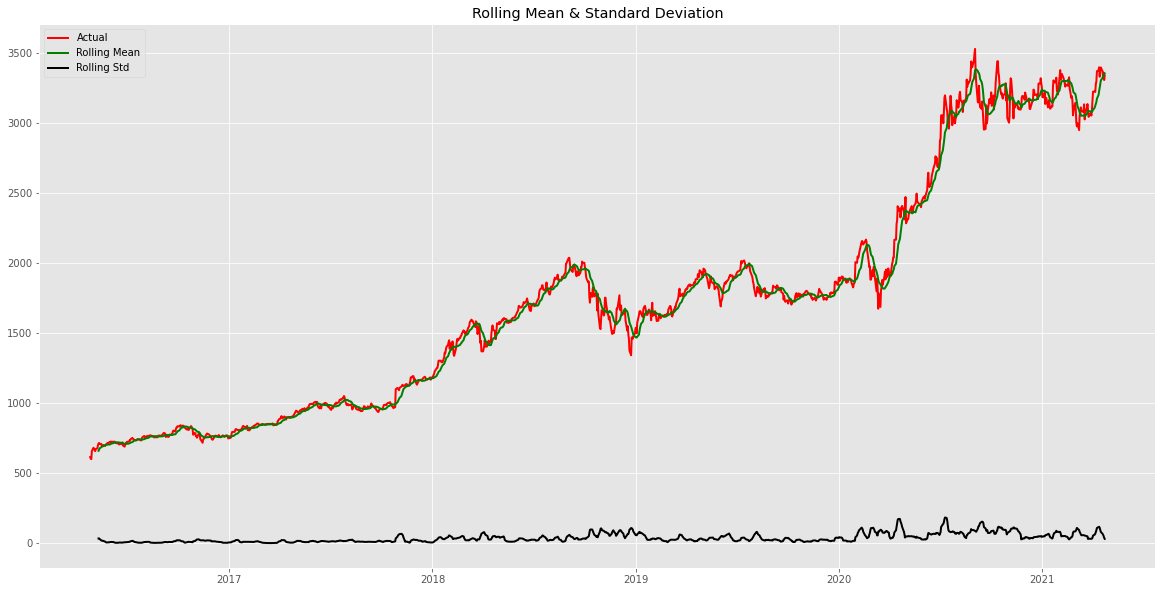

In [ ]:
plt.figure(figsize=(20,10))
actual=plt.plot(df_close, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

pada grafik diatas kita melihat bahwa data actual dan rolling (mean dan std) cukup berbeda, menandakan bahwa series ini tidak stasioner.

##Stationarity Check - Augmented Dickey-Fuller (ADF)

In [ ]:
#Stationarity Check - Augmented Dickey-Fuller (ADF) test
print('Dickey-Fuller Test: ')
dftest=adfuller(df_close['Close'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic             0.202532
p-value                    0.972403
Lags Used                 19.000000
No. of Obs              1284.000000
Critical Value (1%)       -3.435453
Critical Value (5%)       -2.863794
Critical Value (10%)      -2.567970
dtype: float64


Nilai ADF statistic yang jauh lebih besar dari critical values pada semua level, dan juga p-value yang lebih besar dari 0.05 turut menandakan, kita gagal menolak null hypothesis pada 90%, 95%, and 99% confidence, yang berarti bahwa data time series ini strongly non-stationary.

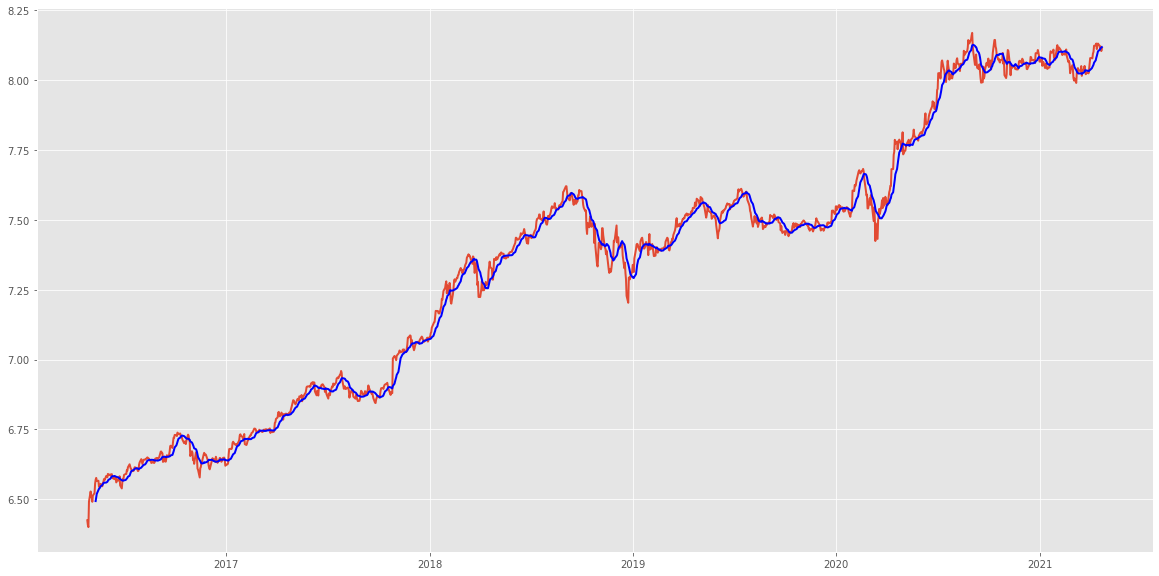

In [ ]:
data_log=np.log(df_close) #kita melakukan log analysis untuk men stabilkan variance dari sebuah series. 

plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean() #disini kita melakukan rolling mean untuk melihat secara visual apakah series ini stationary atau tidak
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')
#plt.plot(MStd, color='red')
#make the data stasioner


In [ ]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Close
Date,
2016-04-26,NaN
2016-04-27,NaN
2016-04-28,NaN
2016-04-29,NaN
2016-05-02,NaN
2016-05-03,NaN
2016-05-04,NaN
2016-05-05,NaN
2016-05-06,NaN


In [ ]:
data_log_diff=data_log.dropna()
data_log_diff.head()

,Close
Date,
2016-04-26,6.424675
2016-04-27,6.407820
2016-04-28,6.400257
2016-04-29,6.491618
2016-05-02,6.527739


In [ ]:
def stationarity(timeseries):
    from statsmodels.tsa.stattools import adfuller
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Close'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

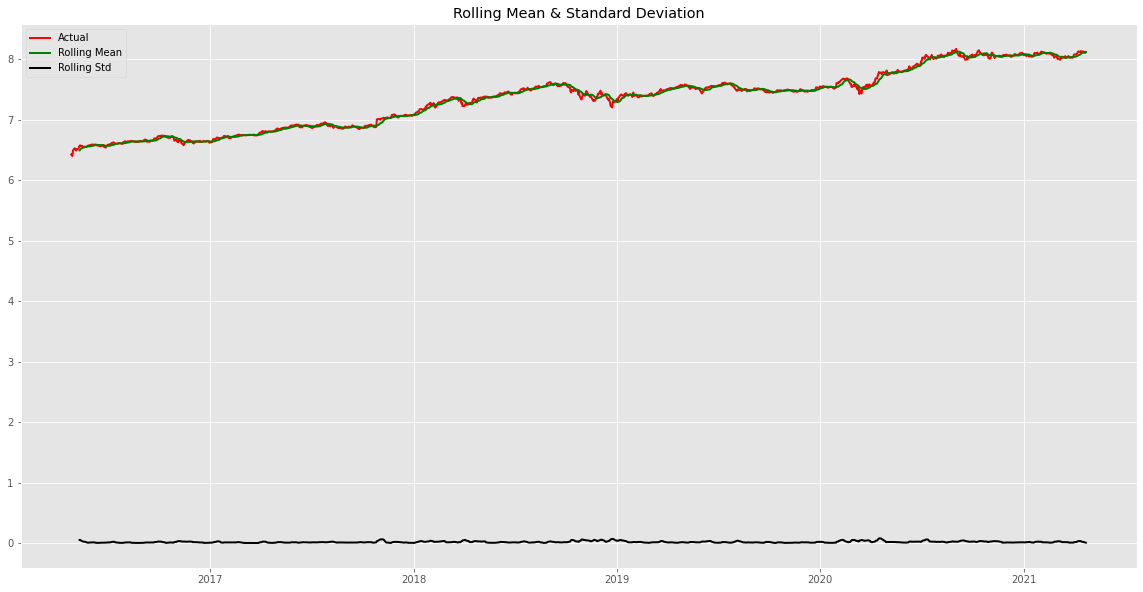

Dickey-Fuller Test: 
Test Statistic            -0.683092
p-value                    0.851081
Lags Used                 10.000000
No. of Obs              1293.000000
Critical Value (1%)       -3.435418
Critical Value (5%)       -2.863778
Critical Value (10%)      -2.567961
dtype: float64


In [ ]:
stationarity(data_log_diff)

Dalam Dickey-Fuller test ini karena 
- t-value (-0.683092) > DF critical value 1% ( -3.435418) maka kita menerima null hypothesis yang menyatakan bahwa series ini tidak stasioner pd tingkat keyakinan 1%,5% dan 10%

- p-value 0.851081 < 0.05 menunjukkan bahwa kita menolak null hypothesis, dan menyatakan bahwa series ini stasioner.

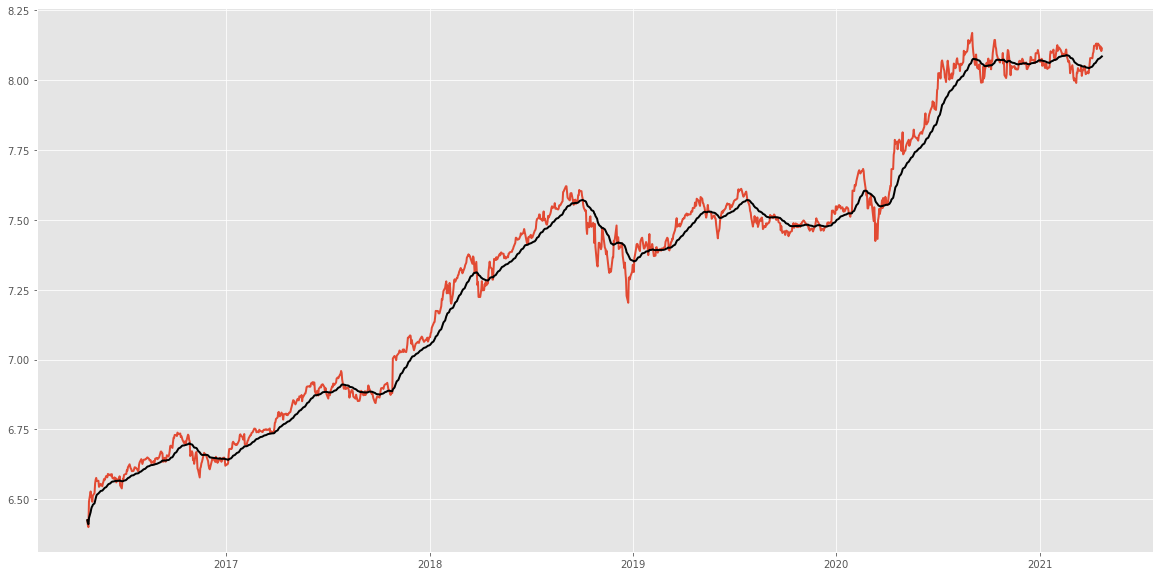

In [ ]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean() #EWM gives more weight to recent observations or it gives less and less weight to data as they are further removed in time, thus it can capture recent trends more quickly
plt.plot(data_log)
plt.plot(exp_data, color='black')

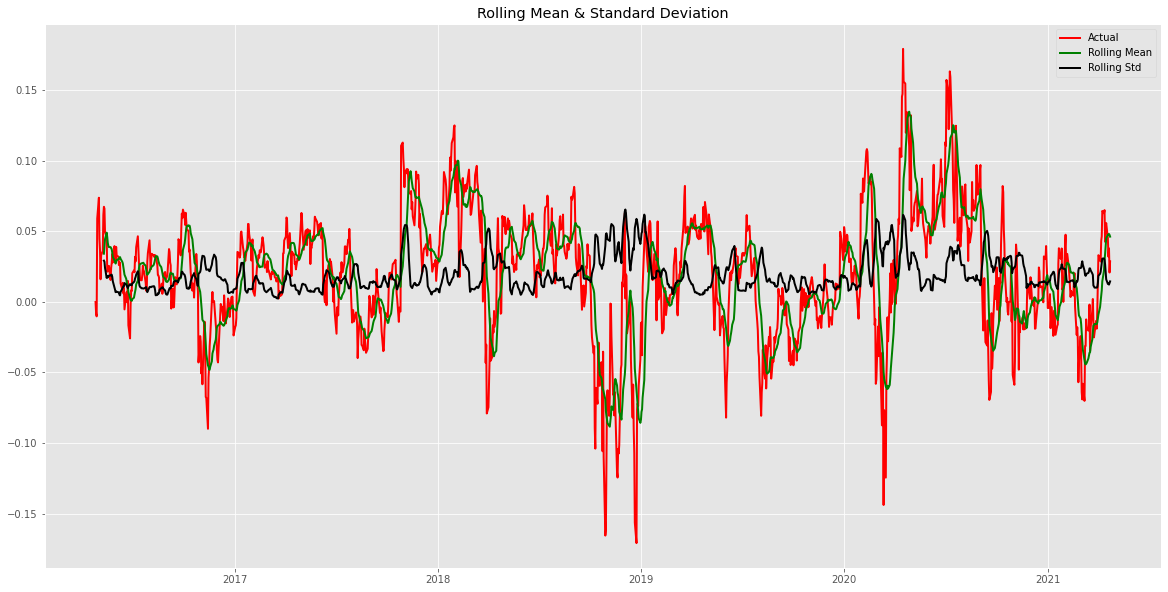

Dickey-Fuller Test: 
Test Statistic         -5.885644e+00
p-value                 3.006160e-07
Lags Used               1.000000e+01
No. of Obs              1.293000e+03
Critical Value (1%)    -3.435418e+00
Critical Value (5%)    -2.863778e+00
Critical Value (10%)   -2.567961e+00
dtype: float64


In [ ]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

Sekarang kita melihat dalam Dickey-Fuller test ini 
- nilai t-value (3.006160e-07) < DF critical value 1% (-3.435418) maka kita menolak null hypothesis, dengan 99% tingkat keyakinan menyatakan bahwa series ini sudah stasioner.

##**Make** the Data Stationary

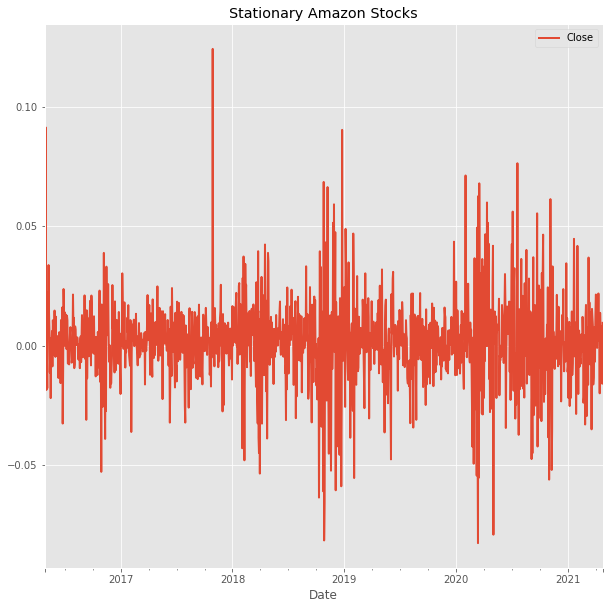

In [ ]:
 #make the data stasioner
#opLog = np.log(amClose) #Take the log of the set for normalization
stationary = data_log - data_log.shift() #Get a stationary set by subtracting the shifted set
stationary = stationary.dropna() #Drop generated null values from the set
stationary.plot(title = "Stationary Amazon Stocks") #Plot the stationary set

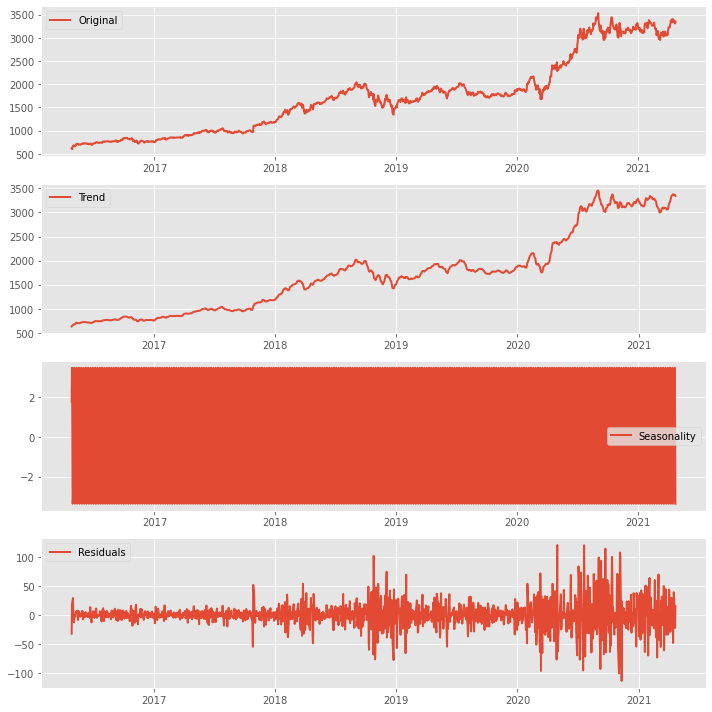

In [ ]:
#Check Trend/Seasonality
decomp=seasonal_decompose(df_close)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411) #4 untuk empat baris , 1 untuk satu kolom, dan 1 untuk urutan pertama
plt.plot(df_close, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

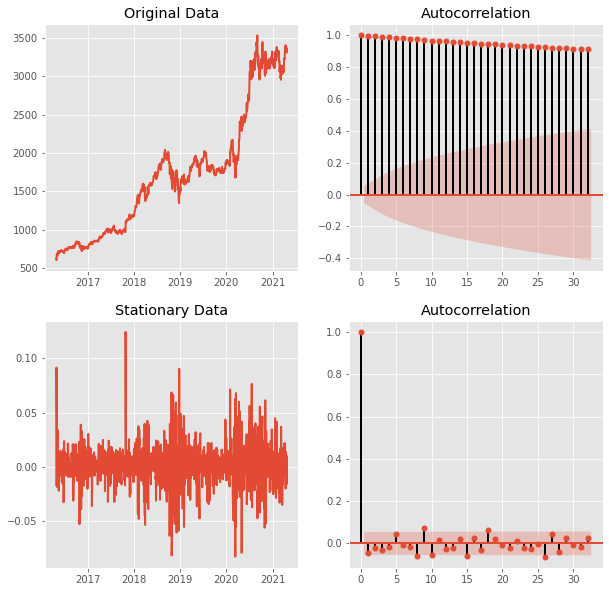

In [ ]:
fig,axes = plt.subplots(2,2) #Set a subset for the data visualizations

a = axes[0,0].plot(df_close["Close"]) #Plot the original data
a = axes[0,0].set_title("Original Data") #Give the original data a name
b = plot_acf(df_close["Close"],ax=axes[0,1]) #Plot the ACF of the original data

x = axes[1,0].plot(stationary["Close"]) #Plot the stationary data
x = axes[1,0].set_title("Stationary Data") #Give the stationary data a name
y = plot_acf(stationary["Close"],ax=axes[1,1]) #Plot the ACF of the stationary data


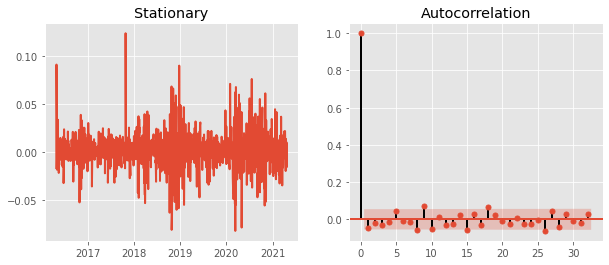

In [ ]:
fig, (axis_1 , axis_2) = plt.subplots(1,2, figsize=(10,4)) #Create a subplot for the Partial ACF
axis_1.plot(stationary["Close"])#Plot the stationary data
axis_1.set_title("Stationary")
plot_acf(stationary["Close"], ax=axis_2);#Plot the partial ACF

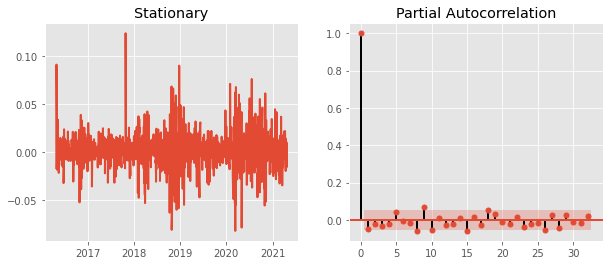

In [ ]:
fig, (axis_1 , axis_2) = plt.subplots(1,2, figsize=(10,4)) #Create a subplot for the Partial PACF
axis_1.plot(stationary["Close"])#Plot the stationary data
axis_1.set_title("Stationary")
plot_pacf(stationary["Close"], ax=axis_2);#Plot the partial PACF

# MODELING & EVALUATION

## Models

In [ ]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

In [ ]:
def ilinechart(df, x, y, groups=None, title=''):
  fig = px.line(df, x=x, y=y, color=groups, title=title, 
                template='none').update(layout=dict(title=dict(x=0.5)))

  fig.show()

In [508]:
#trainn the ARMA
model = ARMA(stationary, order = (0,1)) #Build the ARIMA model
fitModel = model.fit(disp = 1) #Fit the ARIMA model

In [509]:
#trainn the ARIMA
model1 = ARIMA(stationary, order = (5, 1, 5)) #Build the ARIMA model
fitModel1 = model1.fit(disp = 1) #Fit the ARIMA model

In [511]:
#trainn the SARIMAX
model2 = SARIMAX(stationary, order=(1, 1, 1), seasonal_order=(1,1,1,12)) #Build the ARIMA model
fitModel2 = model2.fit(disp = 1) #Fit the SARIMAX model

In [506]:
#VALIDATION
plt.rcParams.update({"figure.figsize" : (12,5), "lines.linewidth": 2}) #Fix the line width
length = int((len(df_close)*9)/10) #Get 9/10 of the length of the data
print(length) #Print the length to make sure it actually is an int

1173


In [ ]:
train = df_close[:length] #Use 9/10 of the data for the train set
test = df_close[length:] #Use the rest for testing

# modelValid = ARIMA(train,order=(5,1,5)) #Create a model for the train set
# fitModelValid = modelValid.fit(disp= -1) #Fit the model

###ARMA

In [ ]:
#ARMA
model = ARMA(df['Close'], order=(0,1)).fit()
df['ARMA'] = model.predict()

In [ ]:
print(model.summary().tables[1])

                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1719.0511     22.937     74.947      0.000    1674.095    1764.007
ma.L1.Close     0.9740      0.005    191.061      0.000       0.964       0.984


In [ ]:
melted = pd.melt(df, id_vars='Date', value_vars=['Close', 'ARMA'], 
                 var_name='variable', value_name='value')

ilinechart(melted, 'Date', 'value', groups='variable', title='Close vs. Modeled')

In [ ]:
modelValid1 = ARMA(train,order=(0,1)) #Create a model for the train set
fitModelValid1 = modelValid1.fit(disp= -1) #Fit the model

In [ ]:
fc1,se1,conf1 = fitModelValid1.forecast(len(df_close) - length) #Forcast over the test area
forecast1 = pd.Series(fc1, index = test.index) #Get the forecast for the area

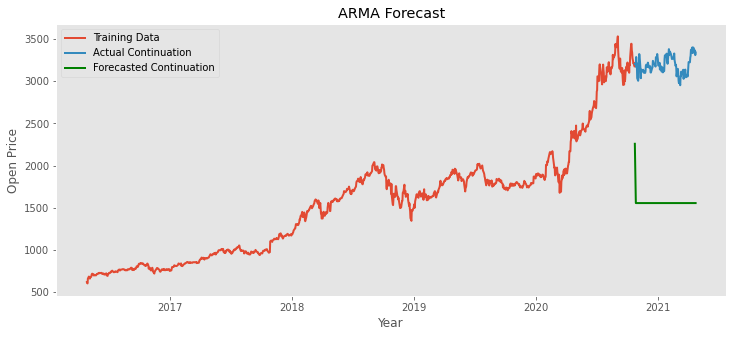

In [ ]:
#Add labels for the train, test, and forecast
plt.plot(train,label = "Training Data") 
plt.plot(test,label = "Actual Continuation")
plt.plot(forecast1,label = "Forecasted Continuation", color = "g")
plt.title("ARMA Forecast") #Add the Forecast title
plt.legend(loc = "upper left") #Put the legend in the top left
plt.xlabel("Year") #Add the year label to the bottom
plt.ylabel("Open Price") #Add the open price to the y axis
plt.grid(False)
plt.show()

In [ ]:
#Predicting
modelPred1 = ARMA(df_close,order=(0,1)) #Create a model for the whole data
fitModelPred1 = modelPred1.fit(disp= -1) #Fit the model

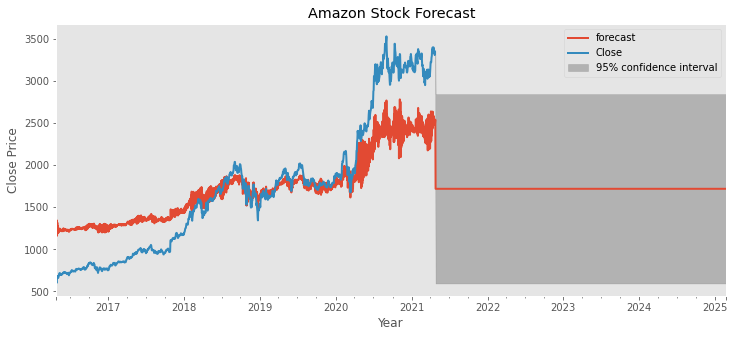

In [ ]:
fitModelPred1.plot_predict(1,len(df_close) + 1000) #Plot predictions for the next thousand days
x = fitModelPred1.forecast(1000) #Forecast the prediction for the next thousand days.
x = plt.title("Amazon Stock Forecast") #Add a stock title
x = plt.xlabel("Year") #Add the year label to the bottom
x = plt.ylabel("Close Price") #Add the open price to the y axis
plt.grid(False)
plt.show()

In [ ]:
#try to forecast
fitModelPred1.forecast(steps=20)

(array([2541.02915095, 1719.3741414 , 1719.3741414 , 1719.3741414 ,
        1719.3741414 , 1719.3741414 , 1719.3741414 , 1719.3741414 ,
        1719.3741414 , 1719.3741414 , 1719.3741414 , 1719.3741414 ,
        1719.3741414 , 1719.3741414 , 1719.3741414 , 1719.3741414 ,
        1719.3741414 , 1719.3741414 , 1719.3741414 , 1719.3741414 ]),
 array([412.58193487, 573.94507309, 573.94507309, 573.94507309,
        573.94507309, 573.94507309, 573.94507309, 573.94507309,
        573.94507309, 573.94507309, 573.94507309, 573.94507309,
        573.94507309, 573.94507309, 573.94507309, 573.94507309,
        573.94507309, 573.94507309, 573.94507309, 573.94507309]),
 array([[1732.38341794, 3349.67488396],
        [ 594.46246904, 2844.28581375],
        [ 594.46246904, 2844.28581375],
        [ 594.46246904, 2844.28581375],
        [ 594.46246904, 2844.28581375],
        [ 594.46246904, 2844.28581375],
        [ 594.46246904, 2844.28581375],
        [ 594.46246904, 2844.28581375],
        [ 594.46

In [542]:
#try to forecast
a =fitModelPred1.forecast(steps=5)
a[0]

array([2541.02915095, 1719.3741414 , 1719.3741414 , 1719.3741414 ,
       1719.3741414 ])

In [543]:
list1 = a[0].tolist()
series1 = pd.Series(list1)
series1

0    2541.029151
1    1719.374141
2    1719.374141
3    1719.374141
4    1719.374141
dtype: float64

In [544]:
df_close.tail(5)

,Close
Date,
2021-04-19,3372.010010
2021-04-20,3334.689941
2021-04-21,3362.020020
2021-04-22,3309.040039
2021-04-23,3340.879883


In [ ]:
#Cek Error
diff = df['Close'] - df['ARMA']
mae = diff.abs().mean()
rmse = np.sqrt(np.mean(diff**2))
print(f'Model ARMA - MAE: {mae} | RMSE: {rmse}')

Model ARMA - MAE: 323.26904088310675 | RMSE: 413.5233160445343


###ARIMA

plotting ARIMA model


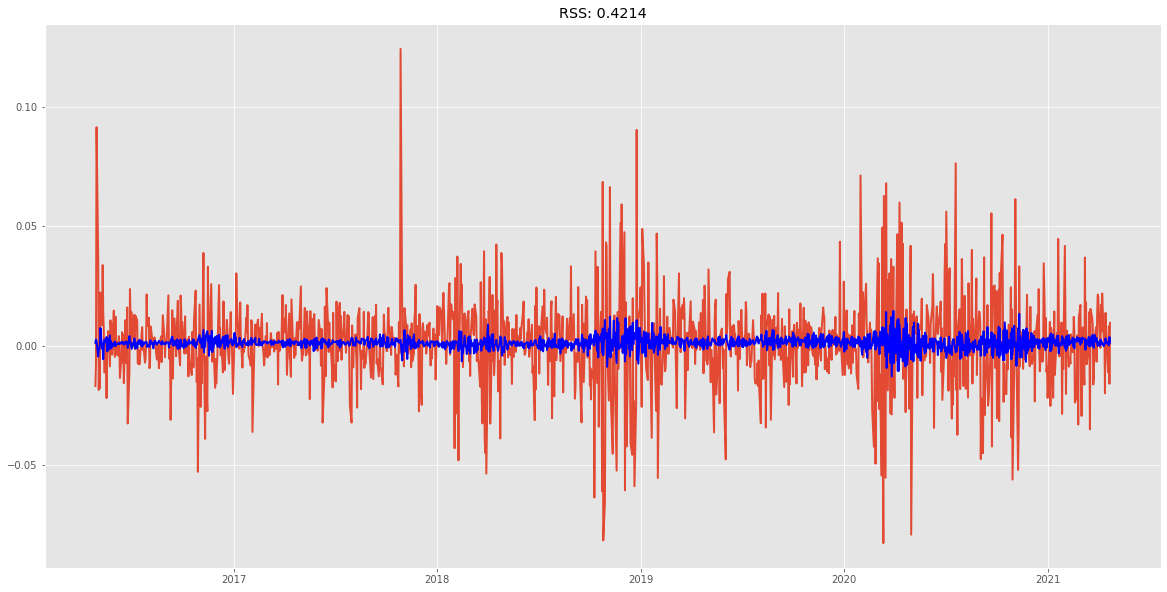

In [ ]:
plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(5,1,5))
results=model.fit(disp=-1)
plt.plot(stationary)
plt.plot(results.fittedvalues, color='blue')
plt.title('RSS: %.4f'% sum((results.fittedvalues-stationary['Close'])**2))
print('plotting ARIMA model')

- warna biru hasil prediksi kita
- warna merah adalah data

In [ ]:
# Persiapan Untuk Plot
model = ARIMA(df['Close'], order=(5,1,5)).fit()
df['ARIMA'] = model.predict(typ='levels')

In [ ]:
print(model.summary().tables[1])

                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.1817      0.802      2.719      0.007       0.609       3.754
ar.L1.D.Close    -0.5729      0.084     -6.819      0.000      -0.738      -0.408
ar.L2.D.Close     0.0755      0.122      0.620      0.536      -0.163       0.314
ar.L3.D.Close    -0.3738      0.101     -3.709      0.000      -0.571      -0.176
ar.L4.D.Close     0.2640      0.120      2.200      0.028       0.029       0.499
ar.L5.D.Close     0.8608      0.083     10.394      0.000       0.699       1.023
ma.L1.D.Close     0.5108      0.076      6.721      0.000       0.362       0.660
ma.L2.D.Close    -0.1174      0.107     -1.101      0.271      -0.326       0.092
ma.L3.D.Close     0.3701      0.088      4.228      0.000       0.198       0.542
ma.L4.D.Close    -0.2870      0.107     -2.680      0.007      -0.497      -0.077
ma.L5.D.Close   

In [ ]:
#Coba Kita Plotkan Prediksi terhadap data kita
melted = pd.melt(df, id_vars='Date', value_vars=['Close','ARIMA'], 
                 var_name='variable', value_name='value')

ilinechart(melted, 'Date', 'value', groups='variable', title='Close vs. Modeled')

In [ ]:
modelValid2 = ARIMA(train,order=(5,1,5)) #Create a model for the train set
fitModelValid2 = modelValid2.fit(disp= -1) #Fit the model

In [ ]:
fc2,se2,conf1 = fitModelValid2.forecast(len(df_close) - length) #Forcast over the test area
forecast2 = pd.Series(fc2, index = test.index) #Get the forecast for the area

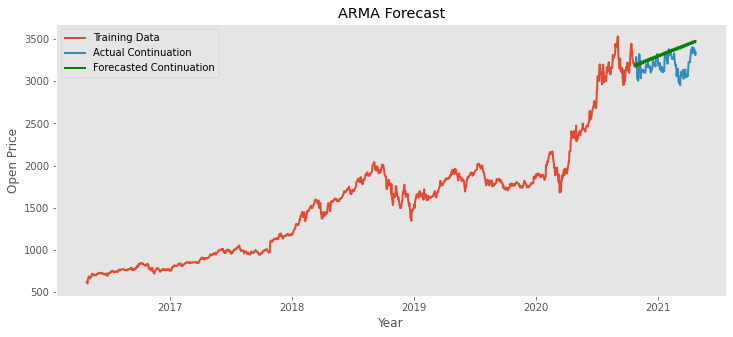

In [ ]:
#Add labels for the train, test, and forecast
plt.plot(train,label = "Training Data") 
plt.plot(test,label = "Actual Continuation")
plt.plot(forecast2,label = "Forecasted Continuation", color = "g")
plt.title("ARMA Forecast") #Add the Forecast title
plt.legend(loc = "upper left") #Put the legend in the top left
plt.xlabel("Year") #Add the year label to the bottom
plt.ylabel("Open Price") #Add the open price to the y axis
plt.grid(False)
plt.show()

In [ ]:
#Predicting
modelPred2 = ARIMA(df_close,order=(5,1,5)) #Create a model for the whole data
fitModelPred2 = modelPred2.fit(disp= -1) #Fit the model

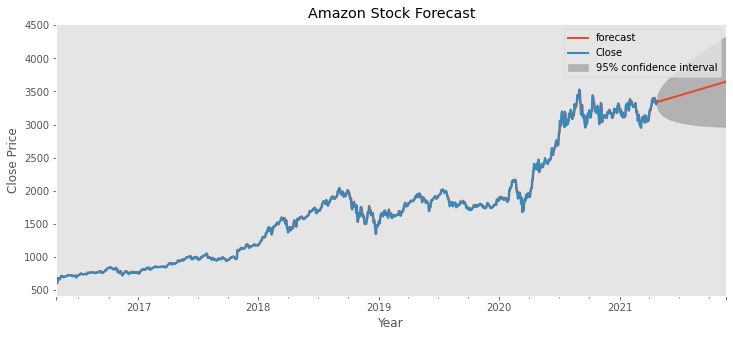

In [515]:
fitModelPred2.plot_predict(1,len(df_close) + 1000) #Plot predictions for the next thousand days
x = fitModelPred2.forecast(1000) #Forecast the prediction for the next thousand days.
x = plt.title("Amazon Stock Forecast") #Add a stock title
x = plt.xlabel("Year") #Add the year label to the bottom
x = plt.ylabel("Close Price") #Add the open price to the y axis
plt.grid(False)
plt.show()

In [ ]:
#try to forecast
fitModelPred2.forecast(steps=20)

(array([3346.70718865, 3350.01184341, 3344.44875919, 3355.82747271,
        3348.95598614, 3355.22425308, 3356.94100034, 3353.45269495,
        3361.96853007, 3356.46028301, 3362.5309878 , 3363.79150247,
        3362.8281007 , 3370.20911634, 3366.72525934, 3372.60673106,
        3373.26484107, 3373.22803035, 3378.68859674, 3376.09083549]),
 array([ 36.22954245,  50.27694463,  60.49621663,  67.61867627,
         74.46580067,  80.1058785 ,  85.77860418,  91.53514648,
         96.78594215, 102.31398686, 107.04170106, 111.47452373,
        115.45304546, 118.82692195, 122.21653773, 125.2572491 ,
        128.45338268, 131.72450043, 134.94926612, 138.36455752]),
 array([[3275.69859027, 3417.71578703],
        [3251.47084268, 3448.55284413],
        [3225.87835339, 3463.01916499],
        [3223.29730253, 3488.35764289],
        [3203.00569875, 3494.90627354],
        [3198.21961627, 3512.2288899 ],
        [3188.81802551, 3525.06397517],
        [3174.04710454, 3532.85828536],
        [3172.27

In [534]:
#try to forecast
a =fitModelPred2.forecast(steps=5)
a[0]


array([3346.70718865, 3350.01184341, 3344.44875919, 3355.82747271,
       3380.5800174 ])

In [535]:
list1 = a[0].tolist()
series1 = pd.Series(list1)
series1

0    3346.707189
1    3350.011843
2    3344.448759
3    3355.827473
4    3380.580017
dtype: float64

In [538]:
#df1 = pd.DataFrame(series1)

In [536]:
df_close.tail(5)

,Close
Date,
2021-04-19,3372.010010
2021-04-20,3334.689941
2021-04-21,3362.020020
2021-04-22,3309.040039
2021-04-23,3340.879883


In [ ]:
#Cek Error
diff = df['Close'] - df['ARIMA']
mae = diff.abs().mean()
rmse = np.sqrt(np.mean(diff**2))
print(f'Model ARIMA - MAE: {mae} | RMSE: {rmse}')

Model ARIMA - MAE: 23.14604697077924 | RMSE: 36.52419851517407


###SARIMAX

In [ ]:
model = SARIMAX(df['Close'], order=(1, 1, 1), seasonal_order=(1,1,1,12)).fit()
df['SARIMAX'] = model.predict()

In [ ]:
print(model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6496      0.133     -4.902      0.000      -0.909      -0.390
ma.L1          0.5909      0.142      4.173      0.000       0.313       0.868
ar.S.L12       0.0078      0.018      0.437      0.662      -0.027       0.043
ma.S.L12      -0.9992      0.161     -6.221      0.000      -1.314      -0.684
sigma2      1402.9993    217.404      6.453      0.000     976.894    1829.104


In [513]:
melted = pd.melt(df, id_vars='Date', value_vars=['Close','SARIMAX'], 
                 var_name='variable', value_name='value')

ilinechart(melted, 'Date', 'value', groups='variable', title='Close vs. Modeled')

In [ ]:
mod = sm.tsa.statespace.SARIMAX(test,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

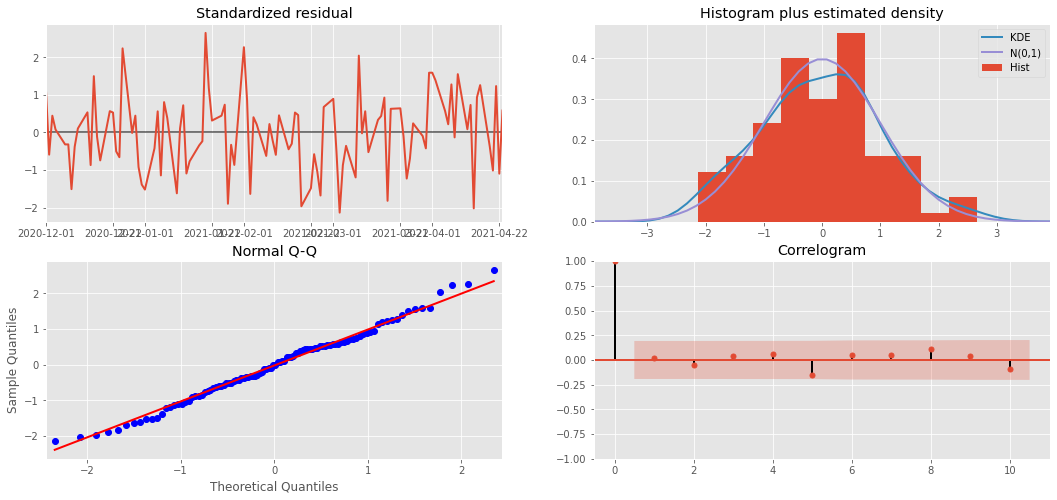

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

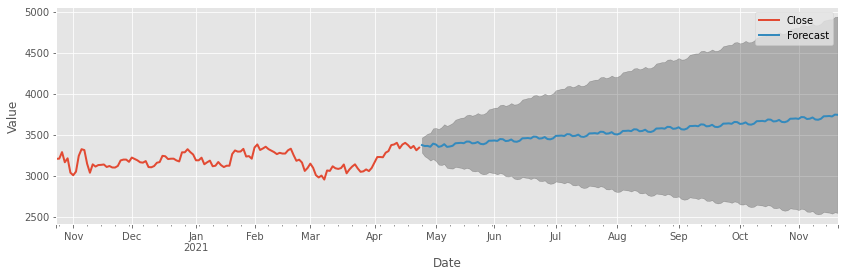

In [516]:
pred_uc = results.get_forecast(steps=150)
pred_ci = pred_uc.conf_int()
ax = test.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Value')
plt.legend()
plt.show()

In [550]:
a =results.get_forecast(steps=5)
b = a.conf_int()
b[['upper Close']]

,upper Close
2021-04-26,3464.217872
2021-04-27,3485.252809
2021-04-28,3510.628150
2021-04-29,3520.409070
2021-04-30,3575.621627


In [523]:
df_close.tail()

,Close
Date,
2021-04-19,3372.010010
2021-04-20,3334.689941
2021-04-21,3362.020020
2021-04-22,3309.040039
2021-04-23,3340.879883


In [ ]:
#Cek Error
diff = df['Close'] - df['SARIMAX']
mae = diff.abs().mean()
rmse = np.sqrt(np.mean(diff**2))
print(f'Model SARIMAX - MAE: {mae} | RMSE: {rmse}')

Model SARIMAX - MAE: 24.5874892494192 | RMSE: 42.32467354560117


##EVALUATION

In [ ]:
#Plot semua model
melted = pd.melt(df, id_vars='Date', value_vars=['Close','ARMA','ARIMA','SARIMAX'], 
                 var_name='Models', value_name='value')

ilinechart(melted, 'Date', 'value', groups='Models', title='Close vs. Modeled')

Berdasarkan diagram diatas dapat disimpulkan bahwa: 
- Prediksi menggunakan modell ARIMA dan SARIMAX sangat baik karena mendekati nilai aktual (CLOSE)
- sedangkan pada ARMA kurang baik karena cenderung menjauhi nilai aktual

In [519]:
models = ['ARMA', 'ARIMA','SARIMAX']

for model in models:
    diff = df['Close'] - df[model]
    mae = diff.abs().mean()
    rmse = np.sqrt(np.mean(diff**2))
    print(f'Model {model} - MAE: {mae}  | RMSE: {rmse}')

Model ARMA - MAE: 323.26904088310675  | RMSE: 413.5233160445343
Model ARIMA - MAE: 23.14604697077924  | RMSE: 36.52419851517407
Model SARIMAX - MAE: 24.5874892494192  | RMSE: 42.32467354560117


Dari Hasil diatas dapat dilihat bahwa Nilai Mean Absolute Error (MAE) dan Root Mean Square Error (RMSE) Dari Model ARIMA  memiliki nilai error yang lebih kecil. oleh karena itu model ini yang akan dipakai karena jarak antara nilai aktual dengan nilai prediksi dapat dikatakan cukup dekat dibandingkan Model yang lain

#DEPLOYMENT

INI DEPLOYMENTNYA KEMANA? WKWKW